## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [32]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import descartes
import sweetviz as sv

%matplotlib inline

In [33]:
df = pd.read_csv("data/kc_house_data.csv")

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


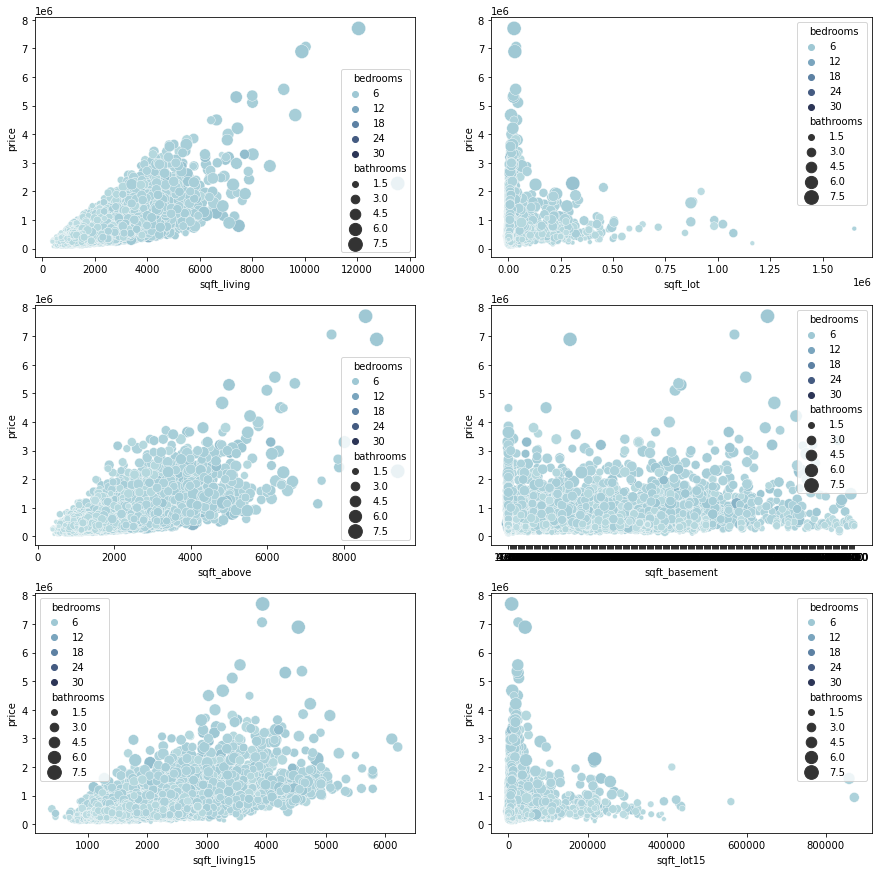

In [26]:
#set visual and style aspects
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)


ax1 = sns.scatterplot(x="sqft_living", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,0]);
ax1.set_xlabel("sqft_living")

sns.scatterplot(x="sqft_lot", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[0,1]);

sns.scatterplot(x="sqft_above", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,0]);

sns.scatterplot(x="sqft_basement", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[1,1]);

sns.scatterplot(x="sqft_living15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,0]);

sns.scatterplot(x="sqft_lot15", y="price",
                hue="bedrooms", size="bathrooms",
                palette=cmap, sizes=(10, 200),
                data=df, ax = axes[2,1]);

In [27]:
my_report = sv.analyze(df,'price')
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
df = df[df['yr_renovated'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   date           17755 non-null  object 
 2   price          17755 non-null  float64
 3   bedrooms       17755 non-null  int64  
 4   bathrooms      17755 non-null  float64
 5   sqft_living    17755 non-null  int64  
 6   sqft_lot       17755 non-null  int64  
 7   floors         17755 non-null  float64
 8   waterfront     15809 non-null  object 
 9   view           17704 non-null  object 
 10  condition      17755 non-null  object 
 11  grade          17755 non-null  object 
 12  sqft_above     17755 non-null  int64  
 13  sqft_basement  17755 non-null  object 
 14  yr_built       17755 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        17755 non-null  int64  
 17  lat            17755 non-null  float64
 18  long  

In [36]:
df = df[df.yr_renovated != 0.00]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             744 non-null    int64  
 1   date           744 non-null    object 
 2   price          744 non-null    float64
 3   bedrooms       744 non-null    int64  
 4   bathrooms      744 non-null    float64
 5   sqft_living    744 non-null    int64  
 6   sqft_lot       744 non-null    int64  
 7   floors         744 non-null    float64
 8   waterfront     652 non-null    object 
 9   view           743 non-null    object 
 10  condition      744 non-null    object 
 11  grade          744 non-null    object 
 12  sqft_above     744 non-null    int64  
 13  sqft_basement  744 non-null    object 
 14  yr_built       744 non-null    int64  
 15  yr_renovated   744 non-null    float64
 16  zipcode        744 non-null    int64  
 17  lat            744 non-null    float64
 18  long    

In [48]:
df.drop(['sqft_lot', 'floors','waterfront','view','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,yr_renovated,zipcode
1,6414100192,12/9/2014,538000.0,3,2.25,2570,Average,1951,1991.0,98125
35,9547205180,6/13/2014,696000.0,3,2.50,2300,Average,1930,2002.0,98115
95,1483300570,9/8/2014,905000.0,4,2.50,3300,Average,1946,1991.0,98040
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,Average,1950,2010.0,98004
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,Average,1914,1992.0,98004


<BarContainer object of 744 artists>

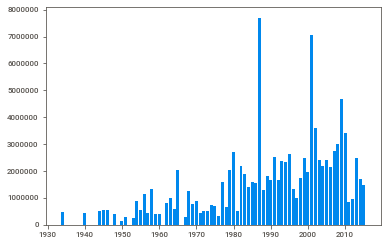

In [54]:
fig,ax = plt.subplots()
ax.bar(df['yr_renovated'], df['price'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 1 to 20946
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            744 non-null    int64  
 1   date          744 non-null    object 
 2   price         744 non-null    float64
 3   bedrooms      744 non-null    int64  
 4   bathrooms     744 non-null    float64
 5   sqft_living   744 non-null    int64  
 6   condition     744 non-null    object 
 7   yr_built      744 non-null    int64  
 8   yr_renovated  744 non-null    float64
 9   zipcode       744 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 63.9+ KB
